# Loading Data

          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments  
0       NaN  
1       NaN  
2       NaN  
3       NaN  
4       NaN  
                 GHI

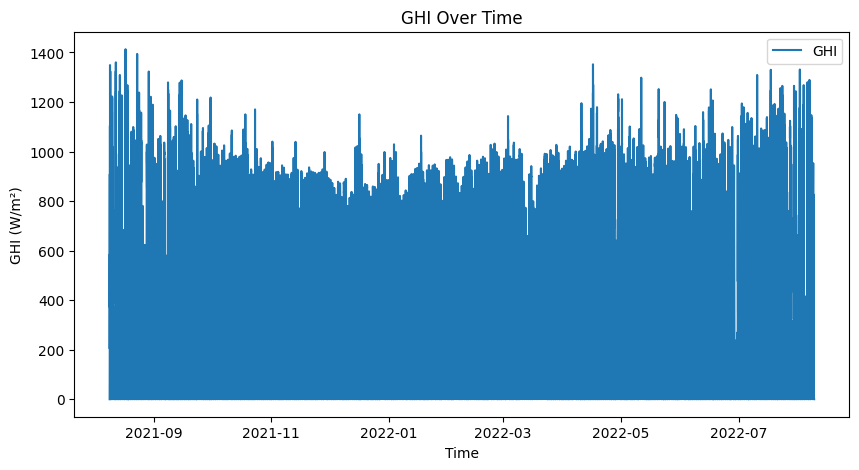

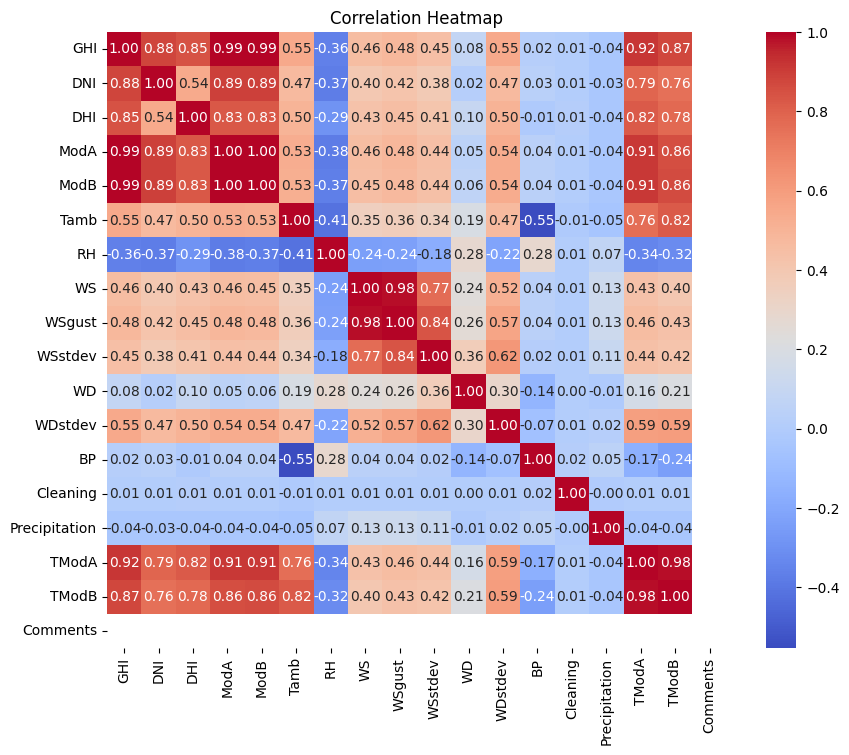

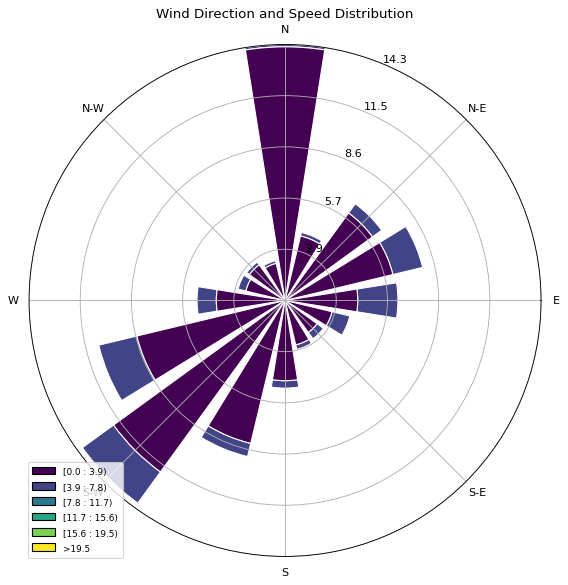

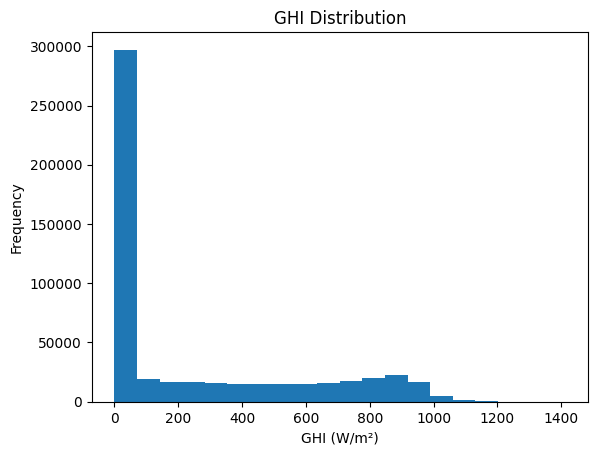

In [1]:
import pandas as pd
from PyQt5.QtWidgets import QApplication, QFileDialog, QWidget
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes


# Create a simple GUI application
app = QApplication([])

# Create a QWidget to use as a window
window = QWidget()

# Open a file dialog to select a CSV file
file_path, _ = QFileDialog.getOpenFileName(
    window, 
    "Select a CSV file", 
    "", 
    "CSV Files (*.csv)"
)

# Check if a file was selected
if file_path:
    # Load the dataset
    data = pd.read_csv(file_path)

    # Inspect the first few rows
    print(data.head())
else:
    print("No file selected.")

# Handling Missing Values and Anomalies
#--------------------------------------

# Check for missing values
missing_summary = data.isnull().sum()

# Replace negative values with NaN
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB']
data[columns_to_check] = data[columns_to_check].map(lambda x: x if x >= 0 else None)

# Fill missing values or drop rows
data.ffill( inplace=True)


# Exploratory Data Analysis (EDA)
# --------------------------------

# Summary statistics
# ------------------
print(data.describe())


# Time Series Plots
# -----------------

# Plot GHI over time
plt.figure(figsize=(10, 5))
plt.plot(pd.to_datetime(data['Timestamp']), data['GHI'], label='GHI')
plt.title('GHI Over Time')
plt.xlabel('Time')
plt.ylabel('GHI (W/m²)')
plt.legend()
plt.show()

# Correlation Analysis
# --------------------
# Correlation heatmap
plt.figure(figsize=(10, 8))
numeric_data = data.select_dtypes(include='number')
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


# Wind Rose for Wind Analysis
# ---------------------------

# Windrose plot
ax = WindroseAxes.from_ax()
ax.bar(data['WD'], data['WS'], normed=True, opening=0.8, edgecolor='white')
ax.set_legend()
plt.title('Wind Direction and Speed Distribution')
plt.show()

# Histogram
# ---------

# Histogram of GHI
data['GHI'].plot(kind='hist', bins=20, title='GHI Distribution')
plt.xlabel('GHI (W/m²)')
plt.show()




